In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to draw graphs
%matplotlib inline
import seaborn as sns

In [107]:
# Data Upload
df=pd.read_csv('/content/drive/MyDrive/AI와무역투자론/Data/Bike_sharing_Tr.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [108]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [110]:
df_train = df[(df.index > '2012-12-01 00:00:00') & ((df.index < '2012-12-18 00:00:00'))]
df_train

df_test = df[df.index >= '2012-12-18 00:00:00']
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2012-12-18 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      48 non-null     int64  
 1   holiday     48 non-null     int64  
 2   workingday  48 non-null     int64  
 3   weather     48 non-null     int64  
 4   temp        48 non-null     float64
 5   atemp       48 non-null     float64
 6   humidity    48 non-null     int64  
 7   windspeed   48 non-null     float64
 8   casual      48 non-null     int64  
 9   registered  48 non-null     int64  
 10  count       48 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 4.5 KB


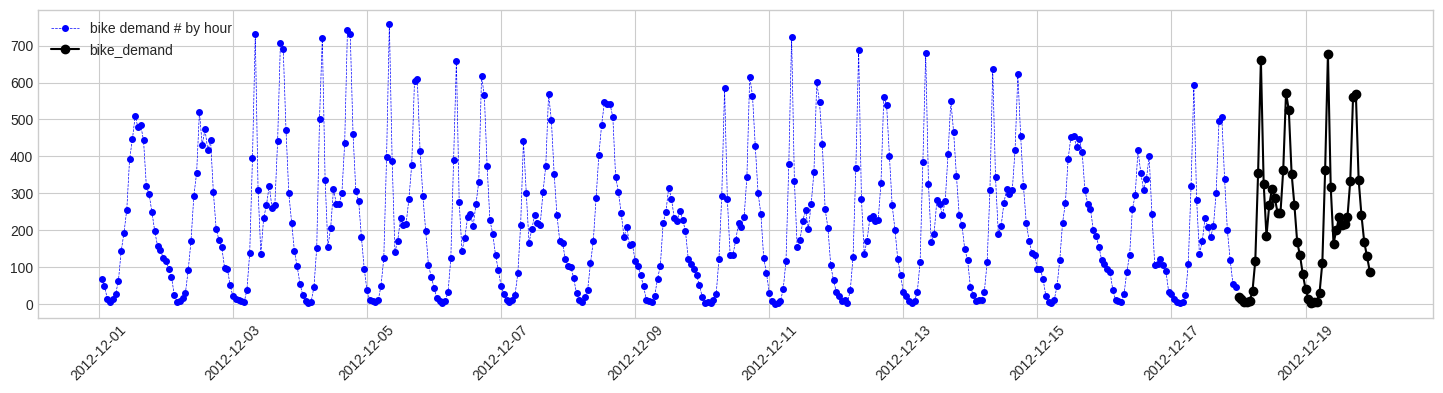

In [165]:
# Bike 시간대별 수요량 그래프
plt.figure(figsize=(18,4))

plt.plot(df_train['count'], marker='o',markersize=4, color='blue',linestyle='--',linewidth=0.5,label='bike demand # by hour')
plt.plot(df_test['count'], marker='o',markersize=6,color='black',label='bike_demand')

#plt.vlines(df_test.index[0], 0, 700, color='red', linestyles='--')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## ARIMA modeling(Fitting)

In [166]:
import statsmodels.api as sm

In [148]:
# building model
mdl = sm.tsa.statespace.SARIMAX(df_train['count'],
                                order=(2,0,2),

                                seasonal_order=(1,0,1,24)
                                )
# data fitting
rslt = mdl.fit()

# 모델링된 결과
print(rslt.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                count   No. Observations:                  407
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 24)   Log Likelihood               -2323.876
Date:                              Thu, 05 Oct 2023   AIC                           4661.753
Time:                                      02:03:16   BIC                           4689.815
Sample:                                  12-01-2012   HQIC                          4672.858
                                       - 12-17-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2239      0.287      4.271      0.000       0.662       1.786
ar.L2         -0.47

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 학습된 모델을 바탕으로 예측수행

In [149]:
forecast_Y = rslt.forecast(steps=48)
forecast_Y

2012-12-18 00:00:00     40.085430
2012-12-18 01:00:00     41.063199
2012-12-18 02:00:00     35.863923
2012-12-18 03:00:00     22.416746
2012-12-18 04:00:00     15.596955
2012-12-18 05:00:00     29.614272
2012-12-18 06:00:00     82.929612
2012-12-18 07:00:00    238.931237
2012-12-18 08:00:00    447.640992
2012-12-18 09:00:00    254.151195
2012-12-18 10:00:00    185.597169
2012-12-18 11:00:00    235.513142
2012-12-18 12:00:00    305.398849
2012-12-18 13:00:00    305.992619
2012-12-18 14:00:00    284.252063
2012-12-18 15:00:00    308.407534
2012-12-18 16:00:00    375.441364
2012-12-18 17:00:00    479.560606
2012-12-18 18:00:00    427.263415
2012-12-18 19:00:00    312.059282
2012-12-18 20:00:00    216.868442
2012-12-18 21:00:00    174.395452
2012-12-18 22:00:00    121.787263
2012-12-18 23:00:00     88.863602
2012-12-19 00:00:00     56.928846
2012-12-19 01:00:00     42.944677
2012-12-19 02:00:00     30.088829
2012-12-19 03:00:00     14.447593
2012-12-19 04:00:00      8.608580
2012-12-19 05:

## 실제값과 예측값 비교

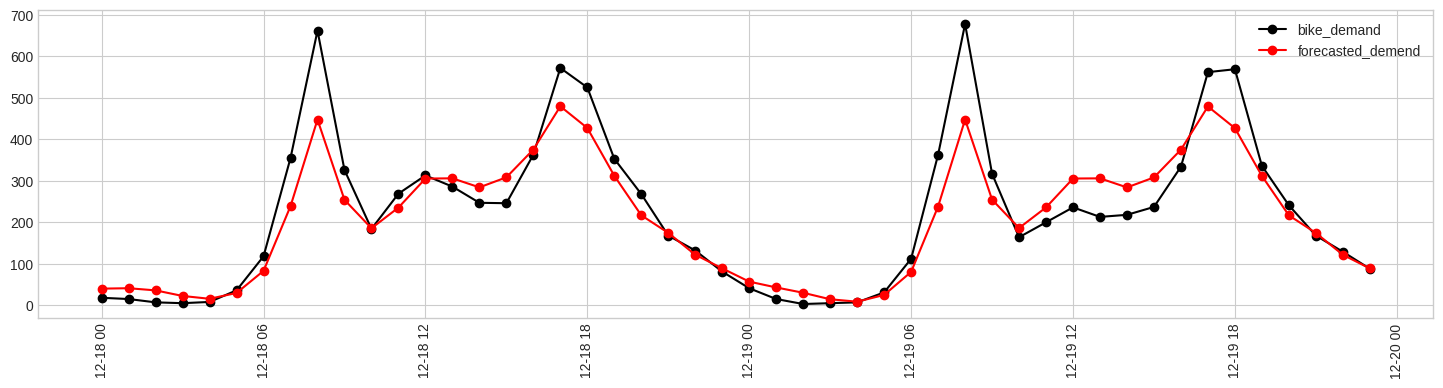

In [150]:
# Bike 시간대별 수요량 그래프
plt.figure(figsize=(18,4))

# 실제값 Plot
plt.plot(df_test['count'], marker='o',markersize=6,color='black',label='bike_demand')

# 예측된 결과값 Plot
plt.plot(forecast_Y.to_frame(), marker='o',markersize=6,color='red',label='forecasted_demend' )

plt.legend()
plt.xticks(rotation=90)
plt.show()

## 실제값과 예측값의 차이 평가

In [151]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

In [153]:
, mean_absolute_percentage_error
print("MAE:", mean_absolute_error(df_test['count'], forecast_Y))
print("RMSE:", mean_squared_error(df_test['count'], forecast_Y)**0.5)
print("MSE:", mean_squared_error(df_test['count'], forecast_Y))

MAE: 46.89943783375347
RMSE: 68.91288638854246
MSE: 4748.985910400162
